In [8]:
# book ref: 
# https://github.com/PacktPublishing/Hands-On-Image-Generation-with-TensorFlow-2.0/blob/master/Chapter01/ch1_generate_first_image.ipynb

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


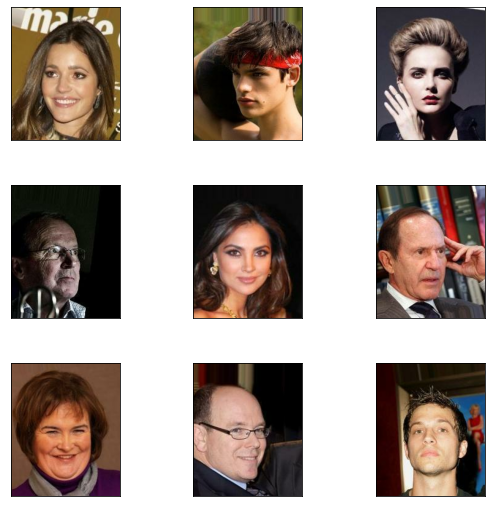

In [2]:
ds_train, ds_info = tfds.load('celeb_a', split = 'test', shuffle_files=False, with_info=True)
fig = tfds.show_examples(ds_info, ds_train)

In [3]:
sample_size = 2000
ds_train = ds_train.batch(sample_size)
features = next(iter(ds_train.take(1)))
n, h, w, c = features['image'].shape

## Generate new image by taking the mean of pixels
Lets calculate the mean of $x_i$ in a subsample (2000 images), where $x_i$ is the value in each pixel

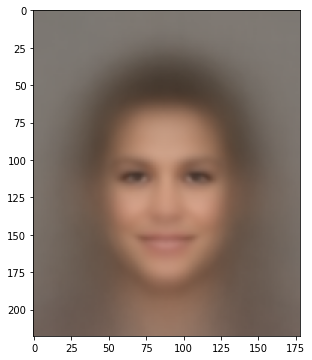

In [4]:
figure = plt.figure(figsize=(8,6))
sample_images = features['image']
new_image = np.mean(sample_images, axis = 0)
plt.imshow(new_image.astype(np.uint8))

## Sample images using attributes
Above was a sample image based on just averagiing (i.e. mean of pixels from 2000 images). Now let's filter based on attributes

In [5]:
# need to define a couple of methods first
def sample(req_attribs):
    sample_bool = []
    for i in range(sample_size):
        match = True
        for req_attrib in req_attribs:
            if features['attributes'][req_attrib][i] == False:
                match = False
                break
        sample_bool.append(match)
    return features['image'][np.array()]

In [6]:
def sample_dataset(req_attribs):
    def sample_batch(features, req_attributes):
        sample_bool = []
        for i in range(sample_size):
            match = True
            for k, v in req_attribs.items():
                if features['attributes'][k][i] != v:
                    match = False
                    break
            sample_bool.append(match)
        return features['image'][np.array(sample_bool, dtype=np.bool)]
    
    samples = None
    for features in ds_train.take(9):
        mini_samples = sample_batch(features, req_attribs)
        if samples is not None:
            samples = np.append(samples, mini_samples, axis = 0)
        else:
            samples = mini_samples
    
    return samples

In [7]:
# let's take a peek at the attributes
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [9]:
attributes_dict = {'Male': True, 'Eyeglasses': True, 'Mustache': True, 'Smiling': True}
show_attribs = {}
images = []
for k, v in attributes_dict.items():
    im = {}
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    im["attributes"] = show_attribs
    im["sample_size"] = len(sample_images)
    im["image"] = np.mean(sample_images, axis=0)
    images.append(im)

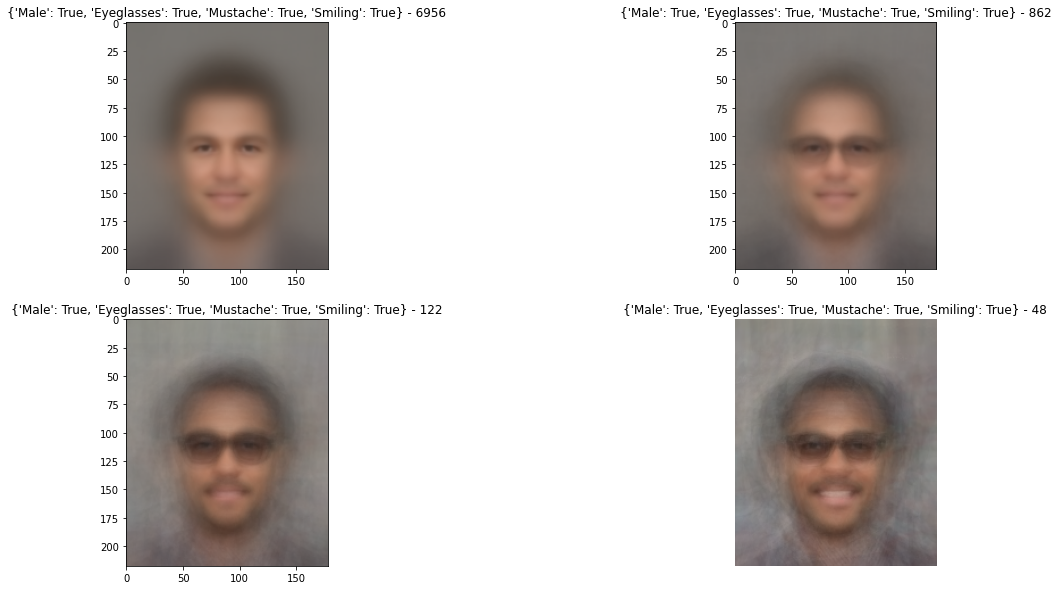

In [10]:
fig, axis = plt.subplots(2, 2)
plt.axis('off')
axis[0][0].imshow(images[0]["image"].astype(np.uint8))
axis[0][0].set_title(f"{images[0]['attributes']} - {images[0]['sample_size']}")
axis[0][1].imshow(images[1]["image"].astype(np.uint8))
axis[0][1].set_title(f"{images[1]['attributes']} - {images[1]['sample_size']}")
axis[1][0].imshow(images[2]["image"].astype(np.uint8))
axis[1][0].set_title(f"{images[2]['attributes']} - {images[2]['sample_size']}")
axis[1][1].imshow(images[3]["image"].astype(np.uint8))
axis[1][1].set_title(f"{images[3]['attributes']} - {images[3]['sample_size']}")
plt.gcf().set_size_inches(20, 10)
plt.show()

## Sample using median

In [ ]:
attributes_dict = {'Male': False, 'Eyeglasses': True, 'Smiling': False, 'Pointy_Nose': True}
show_attribs = {}

images = []
for k, v in attributes_dict.items():
    im = {}
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    im["attributes"] = show_attribs
    im["sample_size"] = len(sample_images)
    im["image"] = np.median(sample_images, axis=0)
    images.append(im)

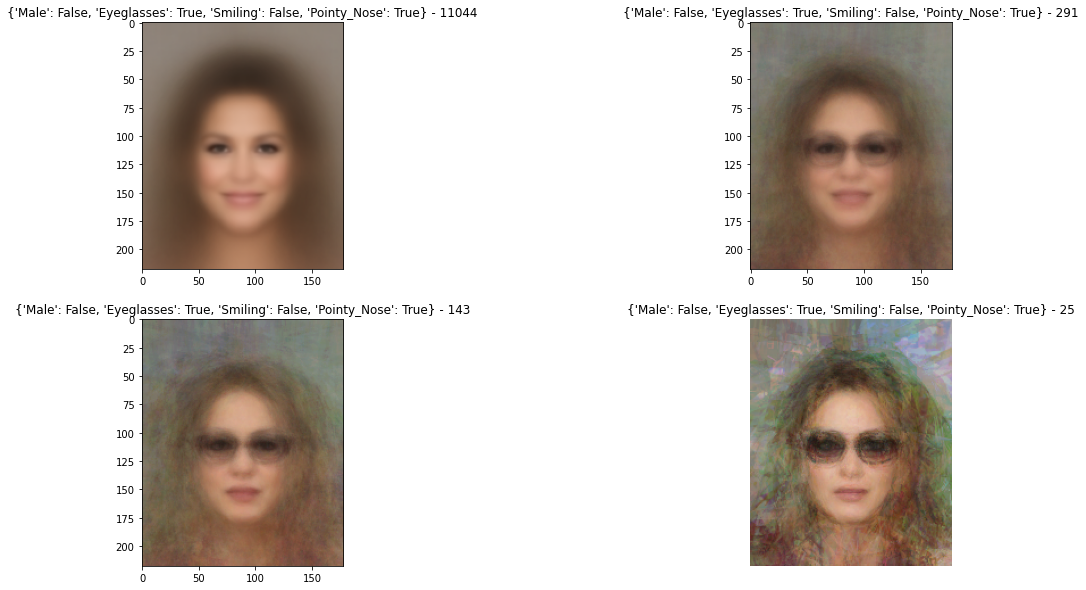

In [18]:
fig, axis = plt.subplots(2, 2)
plt.axis('off')
axis[0][0].imshow(images[0]["image"].astype(np.uint8))
axis[0][0].set_title(f"{images[0]['attributes']} - {images[0]['sample_size']}")
axis[0][1].imshow(images[1]["image"].astype(np.uint8))
axis[0][1].set_title(f"{images[1]['attributes']} - {images[1]['sample_size']}")
axis[1][0].imshow(images[2]["image"].astype(np.uint8))
axis[1][0].set_title(f"{images[2]['attributes']} - {images[2]['sample_size']}")
axis[1][1].imshow(images[3]["image"].astype(np.uint8))
axis[1][1].set_title(f"{images[3]['attributes']} - {images[3]['sample_size']}")
plt.gcf().set_size_inches(20, 10)
plt.show()

# Probabilistic sampling

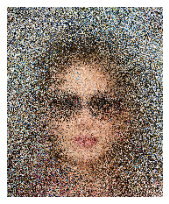

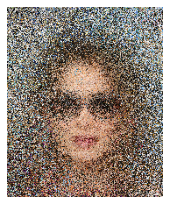

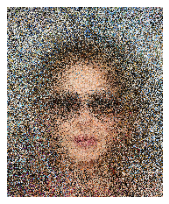

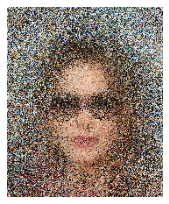

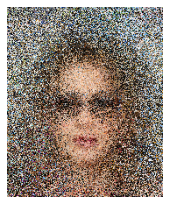

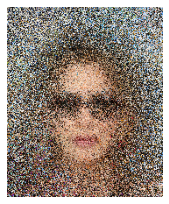

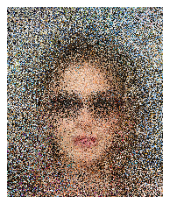

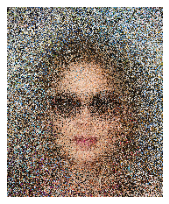

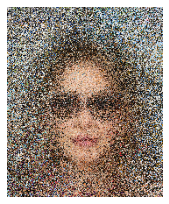

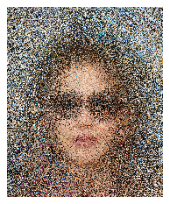

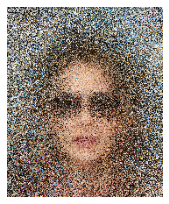

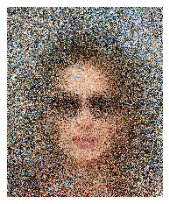

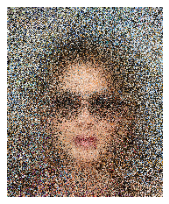

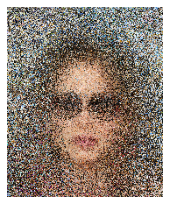

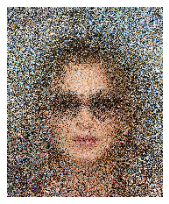

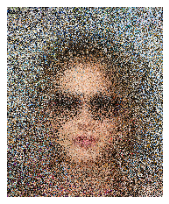

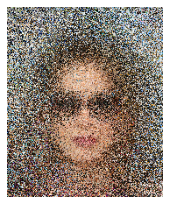

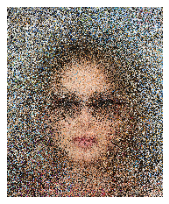

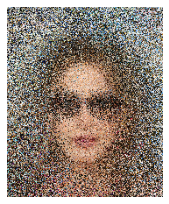

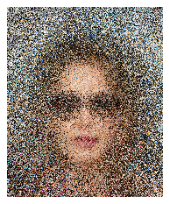

In [11]:
attributes_dict = {'Male': False, 'Eyeglasses': True, 'Smiling': False, 'Pointy_Nose': True}
sample_images = sample_dataset(attributes_dict)
new_image = np.zeros(sample_images.shape[1:], dtype=np.uint8)
images = []
for _ in range(20):
    for i in range(h):
        for j in range(w):
            rand_int = np.random.randint(0, sample_images.shape[0])
            new_image[i,j] = sample_images[rand_int,i,j]
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()